In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('email.csv')

x = df['Message']
y = df['Category']

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.33,random_state=0)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

Tfind = TfidfVectorizer()
xTrain_vec = Tfind.fit_transform(xTrain)
xTest_vec = Tfind.transform(xTest)

model = DecisionTreeClassifier(random_state=0)
model.fit(xTrain_vec, yTrain)
yPred = model.predict(xTest_vec)

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(yTest,yPred))
print("----------------------------------")
print(classification_report(yTest,yPred))
print("----------------------------------")
print(confusion_matrix(yTest,yPred))

0.967373572593801
----------------------------------
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1597
        spam       0.93      0.81      0.87       242

    accuracy                           0.97      1839
   macro avg       0.95      0.90      0.92      1839
weighted avg       0.97      0.97      0.97      1839

----------------------------------
[[1582   15]
 [  45  197]]


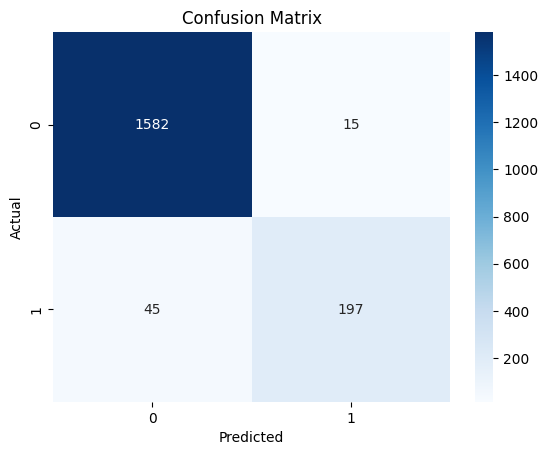

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(yTest, yPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [6]:
import joblib
joblib.dump(model, 'email_dt_model.pkl')
joblib.dump(Tfind, 'email_tfidf_vectorizer.pkl')


['email_tfidf_vectorizer.pkl']